<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up-the-Environment" data-toc-modified-id="Set-up-the-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up the Environment</a></span></li><li><span><a href="#Prepare-the-Data" data-toc-modified-id="Prepare-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the Data</a></span><ul class="toc-item"><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Split-$\mathcal{A}$-into-Cross-validation-and-Test--Subsets-($\mathcal{A}_{cv}$-and-$\mathcal{A}_{test}$)" data-toc-modified-id="Split-$\mathcal{A}$-into-Cross-validation-and-Test--Subsets-($\mathcal{A}_{cv}$-and-$\mathcal{A}_{test}$)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split $\mathcal{A}$ into Cross-validation and Test  Subsets ($\mathcal{A}_{cv}$ and $\mathcal{A}_{test}$)</a></span></li><li><span><a href="#Split-the-Labels-and-the-Samples-in-Other-Datasets" data-toc-modified-id="Split-the-Labels-and-the-Samples-in-Other-Datasets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split the Labels and the Samples in Other Datasets</a></span></li></ul></li><li><span><a href="#Construct-the-Descriptor-based-Feedforward-Neural-Network-Classifier-(DBNN)" data-toc-modified-id="Construct-the-Descriptor-based-Feedforward-Neural-Network-Classifier-(DBNN)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Construct the Descriptor-based Feedforward Neural Network Classifier (DBNN)</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-Descriptor-Builder" data-toc-modified-id="Prepare-the-Descriptor-Builder-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prepare the Descriptor Builder</a></span></li><li><span><a href="#Cross-validate" data-toc-modified-id="Cross-validate-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross-validate</a></span><ul class="toc-item"><li><span><a href="#Show-and-Store-the-CV-Results-and-Reports" data-toc-modified-id="Show-and-Store-the-CV-Results-and-Reports-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Show and Store the CV Results and Reports</a></span></li></ul></li></ul></li><li><span><a href="#Check-if-the-Descriptors-are-Well-formed" data-toc-modified-id="Check-if-the-Descriptors-are-Well-formed-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check if the Descriptors are Well-formed</a></span></li><li><span><a href="#Check-Calibration" data-toc-modified-id="Check-Calibration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check Calibration</a></span></li><li><span><a href="#Evaluate-Classification-Performance" data-toc-modified-id="Evaluate-Classification-Performance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluate Classification Performance</a></span><ul class="toc-item"><li><span><a href="#Performance-on-the-Set-$\mathcal{A}_{test}$" data-toc-modified-id="Performance-on-the-Set-$\mathcal{A}_{test}$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Performance on the Set $\mathcal{A}_{test}$</a></span></li><li><span><a href="#Performance-on-the-Set-$\mathcal{B}$" data-toc-modified-id="Performance-on-the-Set-$\mathcal{B}$-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Performance on the Set $\mathcal{B}$</a></span><ul class="toc-item"><li><span><a href="#Compare-Performance-with-that-on-$\mathcal{A}_{test}$" data-toc-modified-id="Compare-Performance-with-that-on-$\mathcal{A}_{test}$-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Compare Performance with that on $\mathcal{A}_{test}$</a></span></li></ul></li><li><span><a href="#Performance-on-the-Set-$\mathcal{C}$" data-toc-modified-id="Performance-on-the-Set-$\mathcal{C}$-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Performance on the Set $\mathcal{C}$</a></span></li></ul></li><li><span><a href="#Compare-the-DBNN-with-the-Standard-Statistical-Tests" data-toc-modified-id="Compare-the-DBNN-with-the-Standard-Statistical-Tests-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare the DBNN with the Standard Statistical Tests</a></span><ul class="toc-item"><li><span><a href="#Compare-the-TNR-Scores-Using-the-Set-$\mathcal{C}$" data-toc-modified-id="Compare-the-TNR-Scores-Using-the-Set-$\mathcal{C}$-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Compare the TNR Scores Using the Set $\mathcal{C}$</a></span></li><li><span><a href="#Compare-Performance-Using-the-Set-$\mathcal{D}$" data-toc-modified-id="Compare-Performance-Using-the-Set-$\mathcal{D}$-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Compare Performance Using the Set $\mathcal{D}$</a></span><ul class="toc-item"><li><span><a href="#Conduct-ROC-Analysis" data-toc-modified-id="Conduct-ROC-Analysis-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Conduct ROC Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Save" data-toc-modified-id="Save-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save</a></span></li></ul></div>

# Descriptor-Based Neural Networks for Normality Testing <a class="tocSkip">

## Set up the Environment

In [1]:
# Import everything that's needed to run the notebook
import os
import pickle
import pathlib
import datetime
import random

from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics
import sklearn.preprocessing
import scipy.stats
import matplotlib.pyplot as plt
import boruta

import util
from ipynb.fs.defs.sbnn import SBNNPreprocessor

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

Read the configuration.

In [2]:
# Define the path to the configuration dictionary
config_path = 'configuration.p'

# Load the configuration dictionary
with open(config_path, 'rb') as f:
    configuration = pickle.load(f)
    
# Get the paths to the relevant directories 
data_directory_path = configuration['data']['directory_path']
classifiers_directory_path = configuration['classifiers']['directory_path']

# Get the parameters of the experiment
cv_folds = configuration['experiment']['number_of_cv_folds']

## Prepare the Data

### Load the Data

Load the datasets using the function `load_from_file` from `util`.

In [3]:
# Define the dictionary to store the actual datasets, indexed by their names
datasets = {}

# Load the datasets
for set_name in configuration['data']['datasets']:
    set_path = configuration['data']['datasets'][set_name]['path']
    print('Loading {} from {}'.format(set_name, set_path))
    datasets[set_name] = util.load_from_file(set_path)
    print('Done.')

Loading A from data/A.data
Done.
Loading B from data/B.data
Done.
Loading C-G1 from data/C-G1.data
Done.
Loading C-G2 from data/C-G2.data
Done.
Loading C-G3 from data/C-G3.data
Done.
Loading C-G4 from data/C-G4.data
Done.
Loading D from data/D.data
Done.
Loading E from data/E.data
Done.


Show a normal sample from the dataset $\mathcal{A}$. and a non-normal from the group $G_1$ of the dataset $\mathcal{C}$. The normal samples are labeled with $1$, whereas the label of each non-normal one is $0$. The normal samples constitute the "positive" and the non-normal the "negative" class.

In [4]:
print('A normal sample (ending in 1):\n', datasets['A'][0])
print('A non-normal sample (ending in 0):\n', datasets['C-G1'][0])

A normal sample (ending in 1):
 [-79.46376319580664, -84.26989356078793, -86.68589431347755, -93.09879092281287, -86.4982312401116, -85.36905068711518, -86.7653398048915, -81.95194871963047, -81.67820210391082, -86.23312564785603, 1.0]
A non-normal sample (ending in 0):
 [2.954457516189301, -3.952765739542119, 0.034640909231654346, -3.1004914353069997, 0.41292584522629383, -1.120951798480814, -0.3319658052332205, -1.7279519922048643, -3.10246835879567, -1.4679546173993594, 0.0]


### Split $\mathcal{A}$ into Cross-validation and Test  Subsets ($\mathcal{A}_{cv}$ and $\mathcal{A}_{test}$) 

Split $\mathcal{A}$ into the subsets for cross-validation ($\mathcal{A}_{cv})$ and testing ($\mathcal{A}_{test}$).

Use 70% of the set to cross-validate and 30% for subsequent testing and evaluation.

In [5]:
# Extract the labels from the set, leaving only samples in it
labels_A = [labeled_sample.pop() for labeled_sample in datasets['A']]
samples_A = datasets['A']

# There is no need to store the sama data twice, in datasets['A'] and in (samples_A, labels_A)
del datasets['A']

# Define the stratification labels as the combination of actual labels and sample sizes
stratification_labels = [str(label) + str(len(sample)) for (label, sample) in zip(labels_A, samples_A)]

# Set the relative size of the CV subset
train_size = 0.7

# Split the data into CV and test subsets
random_state=None
set_A_cv, set_A_test, y_cv, y_test = train_test_split(samples_A, labels_A, stratify=stratification_labels, 
                                              train_size=train_size, random_state=random_state)

### Split the Labels and the Samples in Other Datasets

In [6]:
for set_name in datasets:
    labels = [sample.pop() for sample in datasets[set_name]]
    samples = datasets[set_name]
    
    datasets[set_name] = {'samples' : samples, 'labels' : labels}

## Construct the Descriptor-based Feedforward Neural Network Classifier (DBNN)

First, register DBNN as a classifer in the configuration.

In [7]:
dbnn_metadata = {
    'name' : 'dbnn',
    'path' :os.path.join(configuration['classifiers']['directory_path'], 'dbnn.p'),
}

configuration['classifiers']['classifiers']['dbnn'] = dbnn_metadata

Create a storage to hold classifier, the results and reports (figures, dataframes and $\LaTeX$ tables).

In [8]:
dbnn_storage = {
    'classifier' : None,
    'classifier_based_test' : None,
    'test_based_classifer' : None,
    'results' : {
        'cv' : {},
        'evaluation' : {},
        'comparison' : {}
    },
    'reports' : {
        'cv' : {},
        'evaluation' : {},
        'comparison' : {}
    }
}

### Prepare the Descriptor Builder

Since the neural networks we devise in this notebook operate with descriptors and not the raw samples, define the class `DescriptorBuilder` to perform that preprocessing step and to be plugged into `sklearn` pipeline.

To do so, define two separate functions: a routine to find the sample's empirical quantiles and a function to determine the descriptor of a given sample.

In [9]:
# Define the function that finds the lowest empirical quantile 
# that is greater than 100q% of the sample (0 < q <= 1).
# The sample has to be sorted in the ascending order in order for this function to work.

def get_quantile(sample, q):
    n = len(sample)
    i = 0
    s = 1.0 / n
    
    while s < q and i < n:
        s = s + 1.0 / n
        i = i + 1

    if i == n:
        i = n - 1

    return sample[i]

In [10]:
# Define the function to construct a sample's descriptor.
def get_descriptor(sample, q, sorted=True):
    # Make sure that the sample is sorted before calling this function
    if sorted == False:
        sample.sort()
        
    # Determine the descriptive statistics
    n = len(sample)
    maximum = max(sample)
    minimum = min(sample)
    mean = np.mean(sample)
    median = np.median(sample)
    sd = np.std(sample)
    #kurtosis = scipy.stats.kurtosis(sample, fisher=False)
    #skewness = scipy.stats.skew(sample)
    
    # Standardize the sample
    standardized_sample = [(x - mean) / sd for x in sample]
    
    # Determine the number of quantiles
    m = int(1 / q)
    
    # Determine the quantiles
    # Note: Optimize this step. All the quantiles can be found in one single pass.
    descriptor = [get_quantile(standardized_sample, j*q) for j in range(1, m + 1)]
    
    # Combine the quantiles and descriptive statistics to get the sample's descriptor
    descriptor = descriptor + [n, mean, sd, minimum, maximum, median]
    
    return descriptor

Now, define the descriptor builder.

In [11]:
class DescriptorBuilder(TransformerMixin, BaseEstimator):
    def __init__(self, q=0.1):
        super(DescriptorBuilder, self).__init__()
        self.q = q
        
        # Set the names of the features in the descriptors
        self.features = ['q{:.2f}'.format(i * q) for i in range(1, int(1/q) + 1)]
        self.features += ['n', 'mean', 'sd', 'minimum', 'maximum', 'median']
        
    def fit(self, X, y=None):
        # Not needed, but present for compatibility.
        return self
    
    def transform(self, X, y=None):
        # Note: Currently works only on a list of lists or a single list.
        if isinstance(X, list):
            if all(isinstance(x, list) for x in X):
                X = [get_descriptor(x, q=self.q, sorted=False) for x in X]
                return pd.DataFrame(X)
            else:
                X = get_descriptor(X, q=self.q, sorted=False)
                return X
        else:
            # Pandas dataframes and numpy arrays are not supported for now.
            pass

### Cross-validate

If you want to use the already trained network, run the following cell to load the network and skip the rest of this Section. In the case you want to do the cross-validation yourself, skip the cell.

In [12]:
path = os.path.join(classifiers_directory_path, 'dbnn_classifier.p')
with open(path, 'rb') as f:
    dbnn = pickle.load(f)

Create a `sklearn` pipeline that consists of the descriptor builder, standard scaler, mean imputer to replace the null values, and the neural network itself.

In [ ]:
descriptor_builder = DescriptorBuilder()
scaler = sklearn.preprocessing.StandardScaler()
imputer = SimpleImputer(strategy='mean')
neural_net = MLPClassifier(solver='adam', max_iter=200, activation='relu',
                           random_state=random_state,
                           early_stopping=True, validation_fraction=0.1)
pipe = Pipeline([('descriptor_builder', descriptor_builder),
                 ('scaler', scaler),
                 ('imputer', imputer),
                 ('neural_net', neural_net),
                ])

Run the grid search to fit the network's parameters and find the best hyperparameters.

In [ ]:
# Specify the hyperparameter grid
param_grid = dict(descriptor_builder__q = [0.05, 0.1],
                  neural_net__hidden_layer_sizes = [(1000,), (100, 10)],
                  neural_net__alpha = [1, 0.1],
                 )

# Define the grid search object
grid = GridSearchCV(pipe,
                    param_grid=param_grid,
                    scoring='accuracy', # for evaluating predictions on the test sets
                    refit=True,
                    cv=cv_folds,
                    verbose=1,
                    n_jobs=-1)

# Perform cross-validation
grid.fit(set_A_cv, y_cv)

#### Show and Store the CV Results and Reports

Get the estimator obtained by fitting to the whole CV set using the best found hyperparameters.

In [ ]:
# Get the trained network.
dbnn = grid.best_estimator_
dbnn_storage['classifier'] = dbnn

# Show its hyperparameters
grid.best_params_

Show the CV results as a `pandas` dataframe.

In [ ]:
# Show the means and deviations of the score(s) and CV time
params = grid.cv_results_['params']
mean_scores = grid.cv_results_['mean_test_score']
score_sds = grid.cv_results_['std_test_score']
mean_fit_times = grid.cv_results_['mean_fit_time']
time_sds = grid.cv_results_['std_fit_time']

results = []
for (params, mean_score, score_sd, mean_fit_time, time_sd) in zip(params, mean_scores, score_sds, mean_fit_times, time_sds):
    alpha = params['neural_net__alpha']
    structure = params['neural_net__hidden_layer_sizes']
    q = params['descriptor_builder__q']
    results.append([q, str(structure), alpha, mean_score, score_sd, mean_fit_time, time_sd])

results_df = pd.DataFrame(results)
results_df.columns = ['q' ,'structure', 'c', 'mean_score', 'score_sd', 'mean_time', 'time_sd']
results_df

Show the results a $\LaTeX$ table. For this, use `get_latex_table` and `mean_sd_merge` from `util`.

In [ ]:
# Define the columns by which to sort the table
sort_by = ['q', 'structure', 'c']

# Define how to merge the means and standard deviations of the score and time
merge_instructions = [{'merge_function' : util.mean_sd_merge, 'new_column' : 'accuracy',
                       'columns_to_merge' : ['mean_score', 'score_sd']},
                      {'merge_function' : util.mean_sd_merge, 'new_column' : 'time',
                       'columns_to_merge' : ['mean_time', 'time_sd']}
                     ]

# Define how to rename the columns (leave None if no renaming is needed)
renamer = None

# Define the table's caption and label, as well as the format for the floats
caption = 'Cross-validation results for the descriptor-based neural networks'
label = 'tab:cv_dbnn'
float_format = '$%.3f$'

# Get the latex source
latex = util.get_latex_table(results_df, sort_by=sort_by, merge_instructions=merge_instructions, renamer=renamer,
                        caption=caption, label=label, float_format=float_format)
# Show it
print(latex)

In [ ]:
# Save the raw results and their dataframe
dbnn_storage['results']['cv'] = grid.cv_results_
dbnn_storage['reports']['cv'] = {'df' : results_df, 'latex' : latex}

## Check if the Descriptors are Well-formed

Check importance of the features that the descriptors consist of. Use the set $\mathcal{B}$ and the `Boruta` algorithm to do so.

Define a function to perform all the steps in the `dbnn` pipeline save for making actual predictions with the neural network.

In [13]:
def prepare_input(X, dbnn_pipe):
    X = dbnn_pipe['descriptor_builder'].transform(X)
    X = dbnn_pipe['scaler'].transform(X)
    X = dbnn_pipe['imputer'].transform(X)
    
    return X

Run the `Boruta` algorithm on the set $\mathcal{B}$.

In [14]:
# Prepare the set B
set_B = datasets['B']['samples']
labels = datasets['B']['labels']
prepared_input = prepare_input(set_B, dbnn)

# Define a random forest for the Boruta selection algorithm
random_forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Configure the Boruta algorithm...
boruta_selector = boruta.BorutaPy(random_forest,
                                  n_estimators='auto',
                                  verbose=1,
                                  random_state=configuration['experiment']['random_state'],
                                  max_iter=50,
                                  perc=85,
                                  alpha=0.05)
# ... and run it.
boruta_selector.fit(prepared_input, labels)

/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Iteration: 1 / 50
Iteration: 2 / 50
Iteration: 3 / 50
Iteration: 4 / 50
Iteration: 5 / 50
Iteration: 6 / 50
Iteration: 7 / 50
Iteration: 8 / 50


BorutaPy finished running.

Iteration: 	9 / 50
Confirmed: 	16
Tentative: 	0
Rejected: 	0


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=113, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F3E4C5A5360),
         max_iter=50, n_estimators='auto', perc=85,
         random_state=RandomState(MT19937) at 0x7F3E4C5A5360, verbose=1)

Show the selected features.

In [15]:
selected_indices = np.where(boruta_selector.support_ == True)[0]
selected_features = [dbnn['descriptor_builder'].features[i] for i in selected_indices]
print(selected_features)

['q0.10', 'q0.20', 'q0.30', 'q0.40', 'q0.50', 'q0.60', 'q0.70', 'q0.80', 'q0.90', 'q1.00', 'n', 'mean', 'sd', 'minimum', 'maximum', 'median']


We see that no features were rejected. Now, check which ones were accepted and about which the algorithm was undecisive and were tentatively kept.

In [16]:
accepted_indices = np.where(boruta_selector.ranking_ == 1)[0]
print('Accepted features:', [dbnn['descriptor_builder'].features[i] for i in accepted_indices])

tentative_indices = np.where(boruta_selector.ranking_ == 2)[0]
print('Tentative features:', [dbnn['descriptor_builder'].features[i] for i in tentative_indices])

rejected_indices = np.where(boruta_selector.ranking_ == 3)[0]
print('Rejected features:', [dbnn['descriptor_builder'].features[i] for i in rejected_indices])

Accepted features: ['q0.10', 'q0.20', 'q0.30', 'q0.40', 'q0.50', 'q0.60', 'q0.70', 'q0.80', 'q0.90', 'q1.00', 'n', 'mean', 'sd', 'minimum', 'maximum', 'median']
Tentative features: []
Rejected features: []


## Check Calibration

Check if the network is well-calibrated.

Create a dataframe consisting of the network's predictes probabilities and actual labels of the samples in the set $\mathcal{D}$.

In [17]:
set_D = prepare_input(datasets['D']['samples'], dbnn)

probabilities = dbnn['neural_net'].predict_proba(set_D)
results_D = pd.DataFrame({'nonnormal_prob' : probabilities[:, 0],
                          'normal_prob' : probabilities[:, 1],
                          'actual_label' : [int(label) for label in datasets['D']['labels']],
                          #'predicted_label' : [int(label) for label in dbnn['neural_net'].predict(X)],
                          'n' : [len(sample) for sample in datasets['D']['samples']],
                         })
results_D

/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


,nonnormal_prob,normal_prob,actual_label,n
0,0.008306,9.916939e-01,1,10
1,0.162478,8.375220e-01,1,10
2,0.004214,9.957859e-01,1,10
3,0.002766,9.972342e-01,1,10
4,0.000015,9.999848e-01,1,10
...,...,...,...,...
26095,1.000000,1.961177e-07,0,100
26096,1.000000,3.125910e-07,0,100
26097,1.000000,6.532131e-08,0,100
26098,1.000000,1.091821e-08,0,100


To check for calibration, partition the probabilities into equal-sized bins and compare the proportions of the predicted normal samples with those of the actual normal samples in all the bins.

First, define some utility functions.

In [18]:
def find_bin_index(x, bins):
    for i in range(len(bins)):
        (left, right) = bins[i]
        if left <= x <= right:
            return i

def determine_predicted_proportions(df, bins):
    df['bin'] = df['normal_prob'].apply(lambda x: find_bin_index(x, bins))
    df['one'] = 1
    
    by_predicted = df[['bin', 'normal_prob']].groupby(by='bin').agg('mean')
    predicted_proportions = by_predicted['normal_prob'].values

    
    return list(predicted_proportions)

def determine_actual_proportions(df, bins):
    df['bin'] = df['normal_prob'].apply(lambda x: find_bin_index(x, bins))
    df['one'] = 1
    
    bin_sums = df[['bin', 'one']].groupby(by='bin').agg('sum')
    
    by_actual = df[['bin', 'actual_label', 'one']].groupby(by=['actual_label', 'bin'])
    by_actual = by_actual.agg('count')

    #for i in range(len(bins)):
    #    if i not in bin_sums.index:
    #        bin_sums.loc[i, 'one'] = 1
    #        by_actual.loc[(1, i), 'one'] = 0
    
    actual_proportions=(by_actual / bin_sums).pipe(pd.DataFrame).loc[(1,)]['one'].values
    
    return list(actual_proportions)

Now, define the bins and visualize the calibration plots.

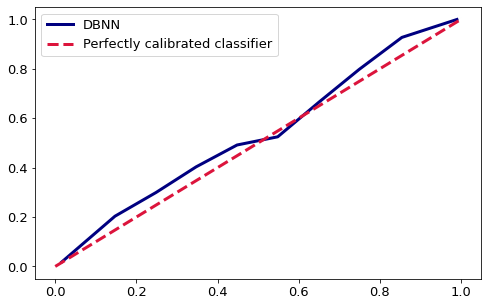

In [19]:
n_bins = 10
bin_size = 1.0 / n_bins
bins = [((i - 1) * bin_size, i * bin_size) for i in range(1, n_bins + 1)]

predicted = determine_predicted_proportions(results_D, bins)
actual = determine_actual_proportions(results_D, bins)

fig = plt.figure(figsize=(8,5))
plt.plot(predicted, actual, color='navy', label='DBNN', linewidth=3)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', linewidth=3,
         color='crimson', label='Perfectly calibrated classifier')
plt.legend(fontsize=13)

dbnn_storage['reports']['evaluation']['calibration'] = {'fig' : fig}

#for n in configuration['data']['datasets']['D']['n_range']:
#    results_subframe = results_D[results_D['n'] == n].copy()
#    
#    predicted = determine_predicted_proportions(results_subframe, bins)
#    actual = determine_actual_proportions(results_subframe, bins)
#    fig = plt.figure(figsize=(8,5))
#    plt.plot(predicted, actual, color='navy', label='DBNN')
#    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--',
#             color='crimson', label='Потпуно калибрисан класификатор')
#    #plt.title('$n={}$'.format(n))
#    plt.legend(fontsize=13)#
#
#    dbnn_storage['reports']['evaluation']['calibration']['fig_{}'.format(n)] = fig

Present the variance by sampling from the dataset and vizualizing the calibration functions determined using the subsets. Plot the mean calibration function and check if it is close to the graph of the identity function, which represents a well-calibrated classifiers. Check if the sampled graphs capture that of the identity function.

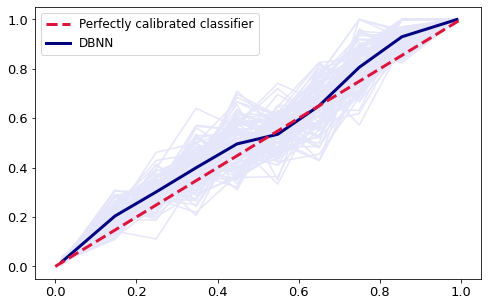

In [20]:
predicted_array = []
actual_array = []
for j in range(100):
    subset = results_D.sample(n=1000)
    proportions = determine_predicted_proportions(subset, bins)
    #random_bins = draw_random_bins(max_size=0.2)
    
    actual = determine_actual_proportions(subset, bins)
    #actual_array.append(actual)
    
    predicted = determine_predicted_proportions(results_D, bins)
    #predicted_array.append(predicted)
    
    if len(actual) == len(predicted):
        actual_array.append(actual)
        predicted_array.append(predicted)
    
mean_predicted_proportions = pd.DataFrame(predicted_array).mean().values
mean_actual_proportions = pd.DataFrame(actual_array).mean().values

fig = plt.figure(figsize=(8, 5))

plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--',
         color='crimson', label='Perfectly calibrated classifier',
         zorder=3, linewidth=3)

plt.plot(mean_predicted_proportions, mean_actual_proportions, color='navy', 
         zorder=2, linewidth=3, label='DBNN')

for predicted, actual in zip(predicted_array, actual_array):
    plt.plot(predicted, actual, color='lavender', zorder=1, alpha=1)

plt.legend(fontsize=12)

dbnn_storage['reports']['evaluation']['calibration']['mean_fig'] = fig

## Evaluate Classification Performance

Use the function `evaluate_pretty` from `util`. It can calculate the following metrics: accuracy, true positive rate, positive predictive value, F1 score, true negative rate, and negative predictive value (see [this Wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix) for definitions) for the whole set and by each sample size, returning the results as a nicely formatted `pandas` dataframe.

### Performance on the Set $\mathcal{A}_{test}$

Calculate and inspect the performance scores.

In [21]:
#import importlib
#importlib.reload(util)

n_range = configuration['data']['datasets']['A']['n_range']
metrics = ['A', 'TPR', 'PPV', 'TNR', 'NPV', 'F1', 'AUROC', 'UR']
results_A_test = util.evaluate_pretty(set_A_test, y_test, dbnn,
                                      n_range=n_range, index='n', metrics=metrics)

#(A_test_results1.set_index('n', drop=True) - A_test_results.set_index('n', drop=True))#.lt(0).sum()
dbnn_storage['results']['evaluation']['A_test'] = results_A_test

latex = util.get_latex_table(results_A_test, index=True, caption='A', label='a')
dbnn_storage['reports']['evaluation']['A_test'] = {'df' : results_A_test, 'latex' : latex}

display(results_A_test)
print(latex)

/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


,A,TPR,PPV,TNR,NPV,F1,AUROC,UR
n,,,,,,,,
10,0.841635,0.757033,0.910769,0.926020,0.792576,0.826816,0.918413,0.0
20,0.896552,0.844388,0.943020,0.948849,0.858796,0.890983,0.971234,0.0
30,0.901660,0.877238,0.922043,0.926020,0.883212,0.899083,0.971756,0.0
40,0.897959,0.846939,0.943182,0.948980,0.861111,0.892473,0.973833,0.0
50,0.905492,0.854220,0.951567,0.956633,0.868056,0.900270,0.979879,0.0
60,0.913155,0.843990,0.979228,0.982143,0.863229,0.906593,0.982998,0.0
70,0.928389,0.930946,0.926209,0.925831,0.930591,0.928571,0.986238,0.0
80,0.932225,0.913043,0.949468,0.951407,0.916256,0.930900,0.986650,0.0
90,0.948914,0.920918,0.975676,0.976982,0.924939,0.947507,0.993130,0.0


\begin{table}
\centering
\caption{A}
\label{a}
\begin{tabular}{lrrrrrrrr}
\toprule
{} &       A &     TPR &     PPV &     TNR &     NPV &      F1 &   AUROC &      UR \\
n       &         &         &         &         &         &         &         &         \\
\midrule
10      & $0.842$ & $0.757$ & $0.911$ & $0.926$ & $0.793$ & $0.827$ & $0.918$ & $0.000$ \\
20      & $0.897$ & $0.844$ & $0.943$ & $0.949$ & $0.859$ & $0.891$ & $0.971$ & $0.000$ \\
30      & $0.902$ & $0.877$ & $0.922$ & $0.926$ & $0.883$ & $0.899$ & $0.972$ & $0.000$ \\
40      & $0.898$ & $0.847$ & $0.943$ & $0.949$ & $0.861$ & $0.892$ & $0.974$ & $0.000$ \\
50      & $0.905$ & $0.854$ & $0.952$ & $0.957$ & $0.868$ & $0.900$ & $0.980$ & $0.000$ \\
60      & $0.913$ & $0.844$ & $0.979$ & $0.982$ & $0.863$ & $0.907$ & $0.983$ & $0.000$ \\
70      & $0.928$ & $0.931$ & $0.926$ & $0.926$ & $0.931$ & $0.929$ & $0.986$ & $0.000$ \\
80      & $0.932$ & $0.913$ & $0.949$ & $0.951$ & $0.916$ & $0.931$ & $0.987$ & $0.000$ \\
90 

Visualize the results.

<AxesSubplot:xlabel='n'>

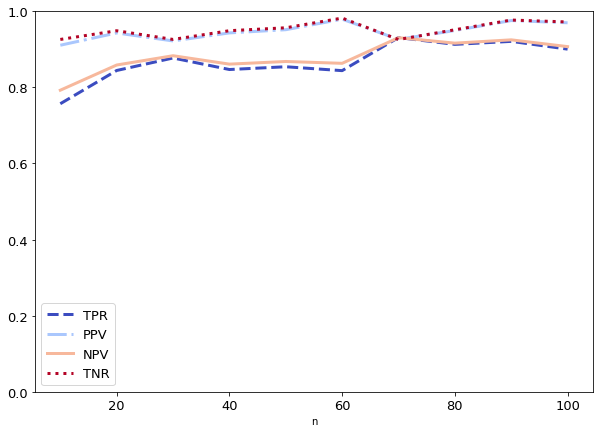

In [26]:
# Create a matplotlib figure
metrics = ['TPR', 'PPV', 'NPV', 'TNR']
mask = results_A_test.index != 'overall'
df_to_plot = results_A_test[mask][metrics]

fig = df_to_plot.plot(kind='line', linewidth=3, style=['--', '-.', '-', ':'],
                      cmap=plt.get_cmap('coolwarm'),
                      figsize=(10,7), use_index=True)
plt.ylim(0, 1)
plt.legend(fontsize=13)

# Store it...
dbnn_storage['reports']['evaluation']['A_test']['fig'] = fig

# ... and show it.
fig

### Performance on the Set $\mathcal{B}$

Calculate and inspect the results.

In [27]:
#import importlib
#importlib.reload(util)

n_range = configuration['data']['datasets']['B']['n_range']

results_B = util.evaluate_pretty(datasets['B']['samples'],
                                 datasets['B']['labels'], dbnn, n_range=n_range, index='n')

latex = util.get_latex_table(results_B, index=True)

dbnn_storage['results']['evaluation']['B'] = results_B
dbnn_storage['reports']['evaluation']['B'] = {'df' : results_B, 'latex' : latex}

display(results_B)
print(latex)

/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


,A,TPR,PPV,TNR,NPV,F1,AUROC
n,,,,,,,
5,0.775479,0.758621,0.785091,0.792337,0.766494,0.771629,0.855737
15,0.871648,0.798467,0.935368,0.944828,0.824198,0.861513,0.946533
25,0.877011,0.829885,0.916244,0.924138,0.844538,0.870929,0.957003
35,0.887739,0.854406,0.915435,0.921073,0.863506,0.883868,0.967113
45,0.915326,0.892720,0.934992,0.937931,0.897361,0.913367,0.979296
55,0.925670,0.902682,0.946185,0.948659,0.906960,0.923922,0.982543
65,0.926054,0.912644,0.937795,0.939464,0.914925,0.925049,0.985679
75,0.920307,0.898851,0.939151,0.941762,0.903012,0.918559,0.984709
85,0.938697,0.919540,0.956175,0.957854,0.922509,0.937500,0.988978


\begin{tabular}{lrrrrrrr}
\toprule
{} &       A &     TPR &     PPV &     TNR &     NPV &      F1 &   AUROC \\
n       &         &         &         &         &         &         &         \\
\midrule
5       & $0.775$ & $0.759$ & $0.785$ & $0.792$ & $0.766$ & $0.772$ & $0.856$ \\
15      & $0.872$ & $0.798$ & $0.935$ & $0.945$ & $0.824$ & $0.862$ & $0.947$ \\
25      & $0.877$ & $0.830$ & $0.916$ & $0.924$ & $0.845$ & $0.871$ & $0.957$ \\
35      & $0.888$ & $0.854$ & $0.915$ & $0.921$ & $0.864$ & $0.884$ & $0.967$ \\
45      & $0.915$ & $0.893$ & $0.935$ & $0.938$ & $0.897$ & $0.913$ & $0.979$ \\
55      & $0.926$ & $0.903$ & $0.946$ & $0.949$ & $0.907$ & $0.924$ & $0.983$ \\
65      & $0.926$ & $0.913$ & $0.938$ & $0.939$ & $0.915$ & $0.925$ & $0.986$ \\
75      & $0.920$ & $0.899$ & $0.939$ & $0.942$ & $0.903$ & $0.919$ & $0.985$ \\
85      & $0.939$ & $0.920$ & $0.956$ & $0.958$ & $0.923$ & $0.938$ & $0.989$ \\
95      & $0.941$ & $0.906$ & $0.974$ & $0.975$ & $0.912$ & $0.938$ & 

Plot the results.

<AxesSubplot:xlabel='n'>

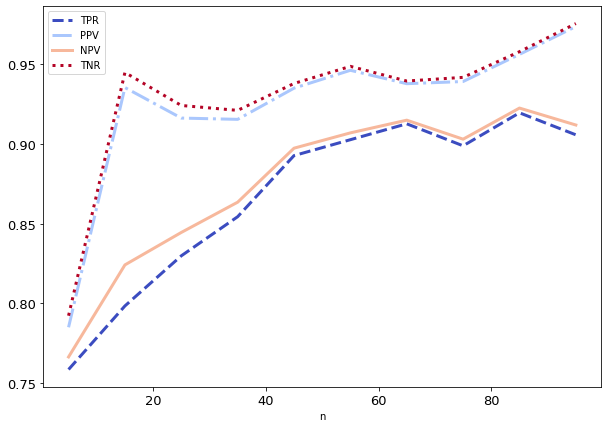

In [28]:
# Create a matplotlib figure
metrics = ['TPR', 'PPV', 'NPV', 'TNR']
mask = results_B.index != 'overall'
df_to_plot = results_B[mask][metrics]

fig = df_to_plot.plot(kind='line', linewidth=3, style=['--', '-.', '-', ':'],
                      cmap=plt.get_cmap('coolwarm'), 
                      figsize=(10,7), use_index=True)

# Store it...
dbnn_storage['reports']['evaluation']['B'] = {'fig' : fig}

# ... and show it.
fig

#### Compare Performance with that on $\mathcal{A}_{test}$

Substituting symbol A from STIXNonUnicode
Substituting symbol B from STIXNonUnicode
Substituting symbol A from STIXNonUnicode
Substituting symbol B from STIXNonUnicode


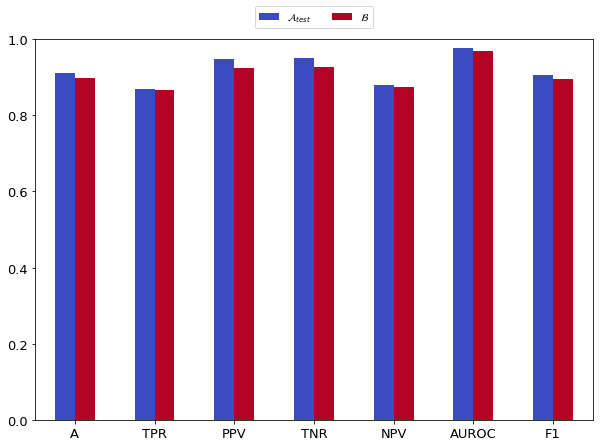

In [29]:
metrics_no_ur = ['A', 'TPR', 'PPV', 'TNR', 'NPV', 'AUROC', 'F1']
df = pd.DataFrame({'$\mathcal{A}_{test}$' : results_A_test.loc['overall', metrics_no_ur],
                   '$\mathcal{B}$' : results_B.loc['overall', metrics_no_ur]})

fig = df.plot(kind='bar', cmap=plt.get_cmap('coolwarm'), 
              figsize=(10, 7), ylim=(0, 1), rot=0)

#help(fig.legend)#(bbox_to_anchor=(1.2, 1.025))
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

dbnn_storage['reports']['evaluation']['AB'] = {'fig' : fig}

### Performance on the Set $\mathcal{C}$

C-G1
C-G2
C-G3
C-G4


,C-G1,C-G2,C-G3,C-G4
n,,,,
10,0.939906,0.998300,0.960504,1.000000
20,0.964004,0.994001,0.966703,1.000000
30,0.958704,0.996300,0.962104,1.000000
40,0.954705,0.998300,0.960604,1.000000
50,0.947205,0.997900,0.959604,1.000000
60,0.942506,0.995800,0.959204,1.000000
70,0.917208,0.989801,0.956604,0.999800
80,0.922308,0.991901,0.958704,0.992801
90,0.913209,0.987301,0.954305,0.931007


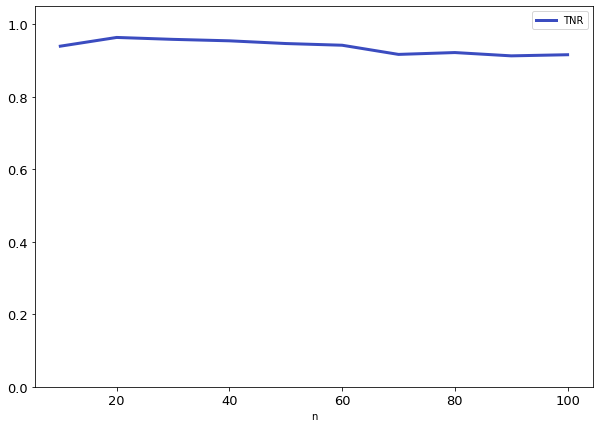

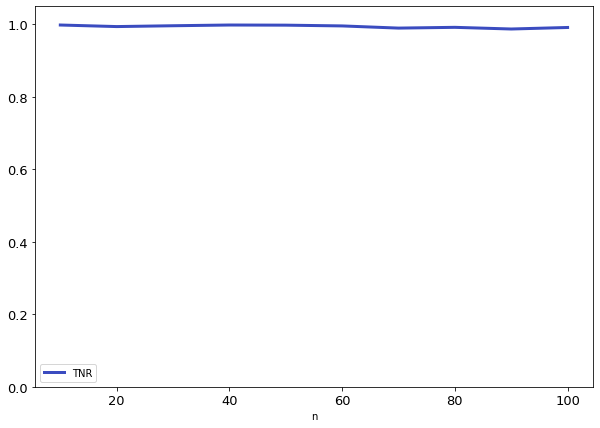

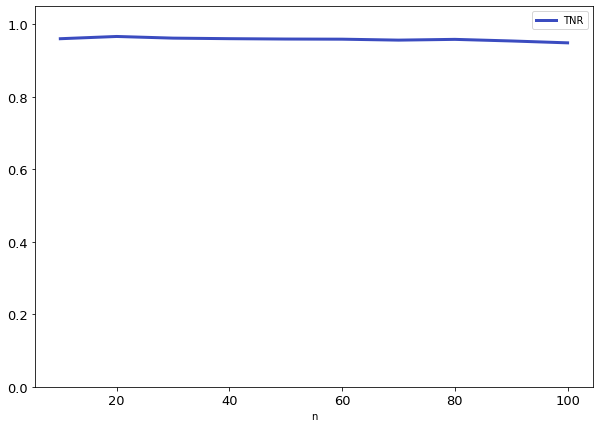

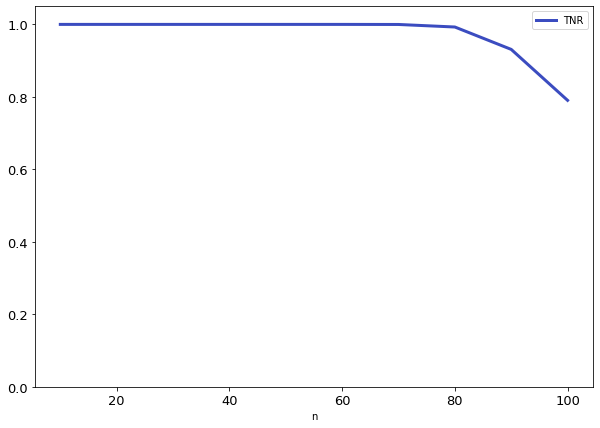

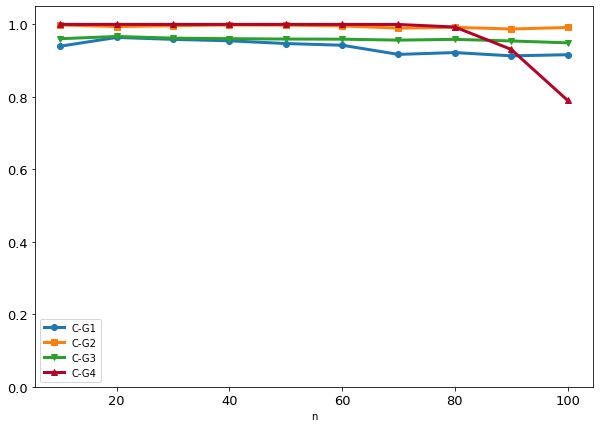

In [30]:
n_range = range(10, 101, 10)
metrics = ['TNR']
for group in ['C-G1', 'C-G2', 'C-G3', 'C-G4']:
    print(group)
    
    samples = datasets[group]['samples']
    labels = datasets[group]['labels']

    df = util.evaluate_pretty(samples, labels, dbnn, metrics=metrics, n_range=n_range, index='n')
    #display(df)

    dbnn_storage['results']['evaluation'][group] = df
    
    fig = df[df.index != 'overall'].plot(kind='line', cmap=plt.get_cmap('coolwarm'), linewidth=3,
                                         figsize=(10,7), use_index=True)
    plt.ylim(0, 1.05)
    dbnn_storage['reports']['evaluation'][group] = {'fig' : fig}
    #display(fig)
    
df = pd.DataFrame({group : dbnn_storage['results']['evaluation'][group]['TNR'] \
                   for group in ['C-G1', 'C-G2', 'C-G3', 'C-G4']})

display(df)
latex = util.get_latex_table(df, index=True)

dbnn_storage['results']['evaluation']['C'] = {'df' : df}

fig = df[df.index != 'overall'].plot(kind='line', cmap=plt.get_cmap('coolwarm'),
                                     figsize=(10,7), use_index=True, linewidth=3,
                                    style=['o-', 's-', 'v-', '^-'])
plt.ylim(0, 1.05)
latex = util.get_latex_table(df, index=True, caption='C', label='c')
dbnn_storage['reports']['evaluation']['C'] = {'latex' : latex, 'fig' : fig}

## Compare the DBNN with the Standard Statistical Tests

Create classifiers based on the selected normality tests and nominal TPR levels.

In [31]:
test_classifiers = {}

codes = ['SW', 'LF', 'JB', 'AD', 'FSSD']

for test_code in codes:
    test, statistic = util.get_test(test_code)
    for alpha in [0.01, 0.05, 0.1]:
        test_classifiers[(test_code, alpha)] = util.TestClassifier(test, statistic, alpha)

Include the statistic-based neural network, even though it technically is not a statistical test.

In [32]:
with open(os.path.join('classifiers', 'sbnn.p'), 'rb') as f:
    sbnn = pickle.load(f)

test_classifiers[('SBNN', '')] = sbnn
codes += ['SBNN']

### Compare the TNR Scores Using the Set $\mathcal{C}$

Note that NPV is 1.0 for all the tests, as well as the DBNN, so we need to look at the TNR values only.

In [33]:
n_range = range(10, 101, 10)
metrics = ['TNR']

for group in ['C-G1', 'C-G2', 'C-G3', 'C-G4']:
    print(group)
    
    samples = datasets[group]['samples']
    labels = datasets[group]['labels']
    
    all_test_results = {}
    for alpha in [0.1]:
        all_test_results[alpha] = {}
        for test_code in codes:
            print('\t', test_code)
            if test_code != 'SBNN':
                test_clf = test_classifiers[(test_code, alpha)]
            else:
                test_clf = test_classifiers[(test_code, '')]
            
            test_results_df = util.evaluate_pretty(samples, labels, test_clf, metrics=metrics, n_range=n_range, index='n')
            all_test_results[alpha][test_code] = test_results_df
            
    dbnn_storage['results']['comparison'][group] = all_test_results

C-G1
	 SW
	 LF
	 JB
	 AD
	 FSSD
	 SBNN
C-G2
	 SW
	 LF
	 JB
	 AD
	 FSSD
	 SBNN
C-G3
	 SW
	 LF
	 JB
	 AD
	 FSSD
	 SBNN
C-G4
	 SW
	 LF
	 JB
	 AD
	 FSSD
	 SBNN


In [48]:
C_results = {}
for group in dbnn_storage['results']['comparison']:
    print(group)
    results = dbnn_storage['results']['comparison'][group]
    results_dict = {'{}({})'.format(test_code, alpha): results[alpha][test_code]['TNR'] for alpha in results\
                    for test_code in results[alpha]}
    results_df = pd.concat(results_dict, axis=1)
    results_df = results_df[sorted(results_df.columns)]
    results_df['DBNN'] = dbnn_storage['results']['evaluation'][group]['TNR']
    results_df = results_df[['DBNN'] + [col for col in results_df.columns if col != 'DBNN']]
    C_results[group] = results_df
    display(results_df)

C-G1


,DBNN,AD(0.1),FSSD(0.1),JB(0.1),LF(0.1),SBNN(0.1),SW(0.1)
n,,,,,,,
10,0.939906,0.334467,0.166383,0.182282,0.305969,0.400160,0.316668
20,0.964004,0.487451,0.208079,0.400460,0.421758,0.511949,0.457554
30,0.958704,0.554845,0.243376,0.504050,0.484152,0.586441,0.539246
40,0.954705,0.613039,0.261774,0.580542,0.544946,0.636436,0.604340
50,0.947205,0.652935,0.285371,0.639336,0.583942,0.655334,0.649535
60,0.942506,0.677732,0.305869,0.675632,0.609839,0.660634,0.679332
70,0.917208,0.709329,0.320968,0.715128,0.642436,0.679432,0.715828
80,0.922308,0.739926,0.354565,0.755124,0.678532,0.712829,0.754625
90,0.913209,0.757124,0.360364,0.769523,0.700530,0.733627,0.766123


C-G2


,DBNN,AD(0.1),FSSD(0.1),JB(0.1),LF(0.1),SBNN(0.1),SW(0.1)
n,,,,,,,
10,0.998300,0.235776,0.106789,0.079592,0.190281,0.315668,0.240576
20,0.994001,0.396860,0.146085,0.241576,0.281872,0.385861,0.407559
30,0.996300,0.528947,0.182382,0.399260,0.392461,0.510949,0.567443
40,0.998300,0.621838,0.218578,0.528247,0.479752,0.605739,0.680832
50,0.997900,0.712129,0.255174,0.640936,0.566443,0.670933,0.775422
60,0.995800,0.776622,0.291771,0.729627,0.630737,0.715928,0.839616
70,0.989801,0.831317,0.327667,0.806419,0.686031,0.759424,0.891011
80,0.991901,0.870313,0.366263,0.857314,0.749525,0.790021,0.922908
90,0.987301,0.908109,0.404160,0.899710,0.795620,0.824018,0.949405


C-G3


,DBNN,AD(0.1),FSSD(0.1),JB(0.1),LF(0.1),SBNN(0.1),SW(0.1)
n,,,,,,,
10,0.960504,0.595340,0.243376,0.286771,0.503550,0.650035,0.610839
20,0.966703,0.790821,0.359664,0.612739,0.702730,0.771423,0.806519
30,0.962104,0.854015,0.436656,0.756024,0.781922,0.826817,0.874513
40,0.960604,0.890911,0.489351,0.827417,0.829117,0.871613,0.911509
50,0.959604,0.915808,0.535046,0.874213,0.862914,0.890411,0.939006
60,0.959204,0.928007,0.573443,0.898410,0.887911,0.899310,0.951005
70,0.956604,0.940706,0.589641,0.921408,0.901610,0.910309,0.963804
80,0.958704,0.951505,0.615038,0.937606,0.921908,0.916708,0.972603
90,0.954305,0.960404,0.627637,0.946905,0.931107,0.922608,0.980902


C-G4


,DBNN,AD(0.1),FSSD(0.1),JB(0.1),LF(0.1),SBNN(0.1),SW(0.1)
n,,,,,,,
10,1.000000,0.206779,0.00090,0.010599,0.151285,0.181182,0.218778
20,1.000000,0.396860,0.00000,0.020798,0.248575,0.165483,0.423458
30,1.000000,0.517748,0.00000,0.030797,0.337966,0.206079,0.569243
40,1.000000,0.611139,0.00010,0.071493,0.425657,0.257474,0.686531
50,1.000000,0.685331,0.00000,0.209079,0.499650,0.297870,0.759224
60,1.000000,0.743726,0.00000,0.357964,0.564444,0.330867,0.820918
70,0.999800,0.784322,0.00000,0.480052,0.611539,0.336366,0.859014
80,0.992801,0.817518,0.00010,0.587941,0.660634,0.361364,0.888011
90,0.931007,0.842516,0.00000,0.681432,0.691831,0.386061,0.906309


\begin{table}
\centering
\caption{C}
\label{c}
\begin{tabular}{lrrrrrrr}
\toprule
{} &    DBNN &  AD(0.1) &  FSSD(0.1) &  JB(0.1) &  LF(0.1) &  SBNN(0.1) &  SW(0.1) \\
n       &         &          &            &          &          &            &          \\
\midrule
10      & $0.940$ &  $0.334$ &    $0.166$ &  $0.182$ &  $0.306$ &    $0.400$ &  $0.317$ \\
20      & $0.964$ &  $0.487$ &    $0.208$ &  $0.400$ &  $0.422$ &    $0.512$ &  $0.458$ \\
30      & $0.959$ &  $0.555$ &    $0.243$ &  $0.504$ &  $0.484$ &    $0.586$ &  $0.539$ \\
40      & $0.955$ &  $0.613$ &    $0.262$ &  $0.581$ &  $0.545$ &    $0.636$ &  $0.604$ \\
50      & $0.947$ &  $0.653$ &    $0.285$ &  $0.639$ &  $0.584$ &    $0.655$ &  $0.650$ \\
60      & $0.943$ &  $0.678$ &    $0.306$ &  $0.676$ &  $0.610$ &    $0.661$ &  $0.679$ \\
70      & $0.917$ &  $0.709$ &    $0.321$ &  $0.715$ &  $0.642$ &    $0.679$ &  $0.716$ \\
80      & $0.922$ &  $0.740$ &    $0.355$ &  $0.755$ &  $0.679$ &    $0.713$ &  $0.755$ \\
90  

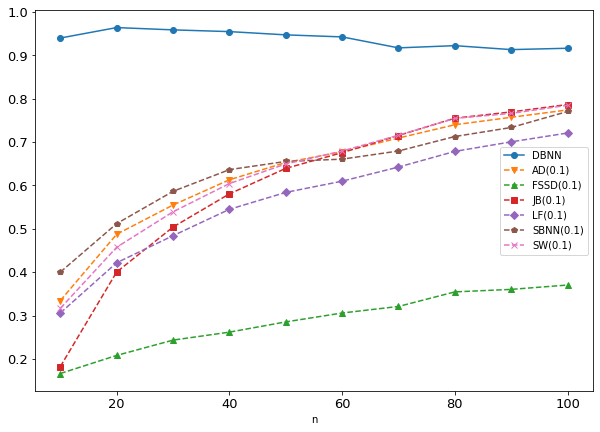

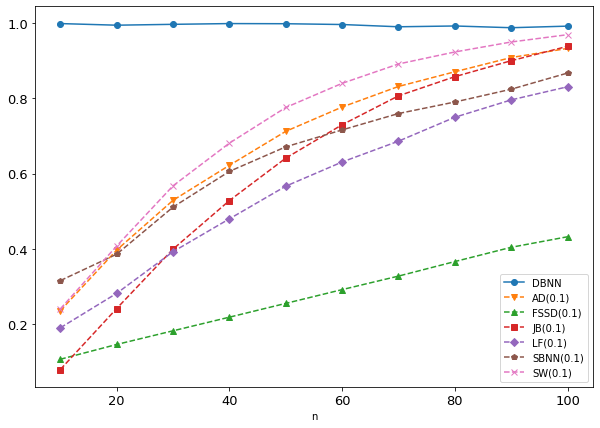

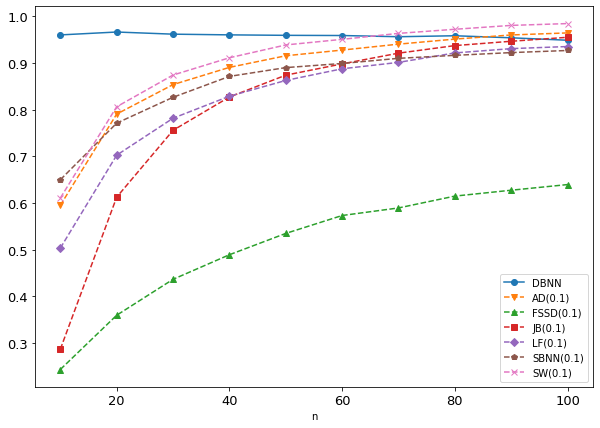

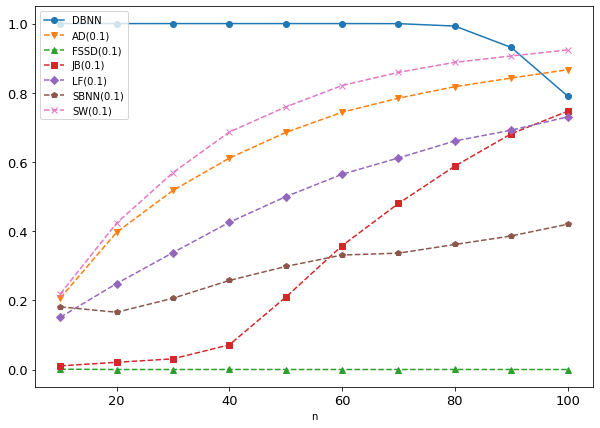

In [52]:
for group in C_results:
    df = C_results[group]
    fig = df[df.index != 'overall'].plot(kind='line', style=['o-', 'v--', '^--', 's--', 'D--', 'p--', 'x--'],
                                         #color=['navy', 'darkred', 'red', 'orangered', 'orange'],
                                         figsize=(10,7), use_index=True)
    latex = util.get_latex_table(df, index=True, caption='C', label='c')
    dbnn_storage['reports']['comparison'][group] = {'fig' : fig, 'latex': latex}
    print(latex)

### Compare Performance Using the Set $\mathcal{D}$

In [53]:
samples = datasets['D']['samples']
labels = datasets['D']['labels']

dbnn_storage['results']['comparison']['D'] = {}

metrics = ['A', 'TPR', 'PPV', 'TNR', 'NPV', 'F1', 'UR']

for (code, alpha) in test_classifiers:
    print(code, alpha)
    classifier = test_classifiers[(code, alpha)]
    results_df = util.evaluate_pretty(samples, labels, classifier, metrics=metrics)
    dbnn_storage['results']['comparison']['D'][(code, alpha)] = results_df

dbnn_storage['results']['comparison']['D'][('DBNN', '')] = util.evaluate_pretty(samples, labels, dbnn,
                                                                               metrics=metrics)

df_report = pd.concat(dbnn_storage['results']['comparison']['D'])
df_report.index=pd.MultiIndex.from_tuples([(x[0], x[1]) for x in df_report.index])

dbnn_storage['reports']['comparison']['D'] = {
    'df' : df_report,
    'latex' : util.get_latex_table(df_report, index=True)
}

SW 0.01


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


SW 0.05
SW 0.1
LF 0.01
LF 0.05
LF 0.1
JB 0.01


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/stats.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/stats.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


JB 0.05
JB 0.1
AD 0.01


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/morestats.py:1786: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s


AD 0.05
AD 0.1
FSSD 0.01
FSSD 0.05
FSSD 0.1
SBNN 


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
ipynb.fs.defs.sbnn:167: RuntimeWarning: divide by zero encountered in double_scalars
ipynb.fs.defs.sbnn:167: RuntimeWarning: invalid value encountered in double_scalars
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Show the dataframe with the results.

In [54]:
df_report

A       TPR       PPV       TNR       NPV        F1  \
SW   0.01  0.820000  0.989425  0.739011  0.650575  0.984006  0.846078   
     0.05  0.839464  0.953027  0.776633  0.725900  0.939223  0.855835   
     0.1   0.835441  0.903218  0.795398  0.767663  0.888042  0.845886   
LF   0.01  0.758659  0.990038  0.676830  0.527280  0.981458  0.804008   
     0.05  0.791341  0.952031  0.720482  0.630651  0.929313  0.820228   
     0.1   0.796897  0.900536  0.745922  0.693257  0.874529  0.815969   
JB   0.01  0.810651  0.984215  0.730603  0.637088  0.975822  0.838655   
     0.05  0.829502  0.967663  0.758165  0.691341  0.955316  0.850199   
     0.1   0.835709  0.948352  0.773984  0.723065  0.933333  0.852342   
AD   0.01  0.801762  0.991341  0.718802  0.612184  0.986053  0.833355   
     0.05  0.826820  0.951264  0.761689  0.702375  0.935115  0.845986   
     0.1   0.826973  0.897701  0.786453  0.756245  0.880846  0.838403   
FSSD 0.01  0.484370  0.691034  0.491980  0.274145  0.465890  0.574761   
     0.05  0.504038  0.677241  0.506157  0.327851  0.499644  0.579332   
     0.1   0.520577  0.654330  0.519562  0.384519  0.522342  0.579210   
SBNN       0.850805  0.933563  0.800986  0.768046  0.920386  0.862208   
DBNN       0.912337  0.878161  0.942589  0.946513  0.885956  0.909235   

                 UR  
SW   0.01  0.000000  
     0.05  0.000000  
     0.1   0.000000  
LF   0.01  0.000000  
     0.05  0.000000  
     0.1   0.000000  
JB   0.01  0.000000  
     0.05  0.000000  
     0.1   0.000000  
AD   0.01  0.000000  
     0.05  0.000000  
     0.1   0.000000  
FSSD 0.01  0.008467  
     0.05  0.008467  
     0.1   0.008467  
SBNN       0.000000  
DBNN       0.000000

Show the LaTeX table.

In [55]:
print(util.get_latex_table(df_report, index=True))

\begin{tabular}{llrrrrrrr}
\toprule
     &     &       A &     TPR &     PPV &     TNR &     NPV &      F1 &      UR \\
\midrule
SW & 0.01 & $0.820$ & $0.989$ & $0.739$ & $0.651$ & $0.984$ & $0.846$ & $0.000$ \\
     & 0.05 & $0.839$ & $0.953$ & $0.777$ & $0.726$ & $0.939$ & $0.856$ & $0.000$ \\
     & 0.1 & $0.835$ & $0.903$ & $0.795$ & $0.768$ & $0.888$ & $0.846$ & $0.000$ \\
LF & 0.01 & $0.759$ & $0.990$ & $0.677$ & $0.527$ & $0.981$ & $0.804$ & $0.000$ \\
     & 0.05 & $0.791$ & $0.952$ & $0.720$ & $0.631$ & $0.929$ & $0.820$ & $0.000$ \\
     & 0.1 & $0.797$ & $0.901$ & $0.746$ & $0.693$ & $0.875$ & $0.816$ & $0.000$ \\
JB & 0.01 & $0.811$ & $0.984$ & $0.731$ & $0.637$ & $0.976$ & $0.839$ & $0.000$ \\
     & 0.05 & $0.830$ & $0.968$ & $0.758$ & $0.691$ & $0.955$ & $0.850$ & $0.000$ \\
     & 0.1 & $0.836$ & $0.948$ & $0.774$ & $0.723$ & $0.933$ & $0.852$ & $0.000$ \\
AD & 0.01 & $0.802$ & $0.991$ & $0.719$ & $0.612$ & $0.986$ & $0.833$ & $0.000$ \\
     & 0.05 & $0.827$ & $0.951$ 

#### Conduct ROC Analysis

Plot the ROC curves and calculate the areas under them.

DBNN


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


LF
JB


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/stats.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/stats.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


AD


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/morestats.py:1786: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s


SW


/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


FSSD
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be > 0. Was 0.0
sigma2 must be 

/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/milos/statisticka_klasifikacija/p3/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
ipynb.fs.defs.sbnn:167: RuntimeWarning: divide by zero encountered in double_scalars
ipynb.fs.defs.sbnn:167: RuntimeWarning: invalid value encountered in double_scalars


NameError: name 'x' is not defined

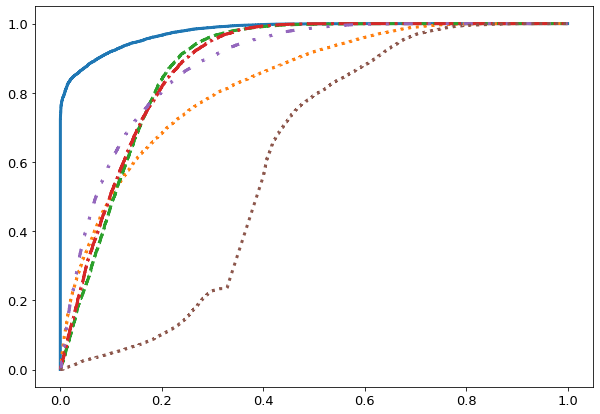

In [63]:
samples = datasets['D']['samples']
labels = datasets['D']['labels']

fig = plt.figure(figsize=(10, 7))
styles = ['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5))] * 4

aurocs = {}

print('DBNN')
prepared_input = prepare_input(samples, dbnn)
probabilities = dbnn['neural_net'].predict_proba(prepared_input)
scores = probabilities[:, 1]
mask = np.isfinite(np.array(scores))    
filtered_labels = np.array(labels)[mask]
filtered_scores = np.array(scores)[mask]
fpr, tpr, tr = sklearn.metrics.roc_curve(filtered_labels, filtered_scores, pos_label=1)
plt.plot(fpr, tpr, label='DBNN', linestyle='-', linewidth=3)
aurocs['DBNN'] = sklearn.metrics.roc_auc_score(filtered_labels, filtered_scores)

for code in ['LF', 'JB', 'AD', 'SW', 'FSSD']:
    alpha = 0.01
    print(code)
    _, statistic = util.get_test(code)
    scores = np.array([statistic(sample) for sample in samples])
    
    if code in ['LF', 'JB', 'AD', 'FSSD']:
        scores = -scores
    
    mask = np.isfinite(scores)   
    filtered_labels = np.array(labels)[mask]
    filtered_scores = np.array(scores)[mask]
    
    fpr, tpr, tr = sklearn.metrics.roc_curve(filtered_labels, filtered_scores, pos_label=1)
    
    plt.plot(fpr, tpr, label=code, linestyle=styles.pop(0), linewidth=3)
    aurocs[code] = sklearn.metrics.roc_auc_score(filtered_labels, filtered_scores)
    


print('SBNN')
data = sbnn['preprocessor'].transform(samples)
data = sbnn['scaler'].transform(x)
prepared_input = sbnn['imputer'].transform(data)
probabilities = sbnn['neural_net'].predict_proba(prepared_input)
scores = probabilities[:, 1]
mask = np.isfinite(np.array(scores))    
filtered_labels = np.array(labels)[mask]
filtered_scores = np.array(scores)[mask]
fpr, tpr, tr = sklearn.metrics.roc_curve(filtered_labels, filtered_scores, pos_label=1)
plt.plot(fpr, tpr, label='SBNN', linestyle=styles.pop(0), linewidth=3)
aurocs['SBNN'] = sklearn.metrics.roc_auc_score(filtered_labels, filtered_scores)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(fontsize=13)

Show the values of the AUROC.

In [61]:
aurocs

{'DBNN': 0.9784889534798373,
 'LF': 0.8288502341421882,
 'JB': 0.8801876654662654,
 'AD': 0.8823062620539311,
 'SW': 0.8849667063020215,
 'FSSD': 0.5988348625853362,
 'SBNN': 0.9198287811394431}

Store the calculated values and the figure.

In [62]:
dbnn_storage['results']['comparison']['D']['auroc'] = aurocs
dbnn_storage['reports']['comparison']['D']['auroc_fig'] = fig

## Save

Save the classifier, the results and reports.

In [ ]:
classifier = grid.best_estimator_
path = os.path.join(classifiers_directory_path, 'dbnn.p')
#with open(path, 'wb') as f:
#    pickle.dump(classifier, f)
    
results_directory_path = configuration['results']['directory_path']
path = os.path.join(results_directory_path, 'dbnn_results.p')
with open(path, 'wb') as f:
    pickle.dump(dbnn_storage['results'], f)

reports_directory_path = configuration['reports']['directory_path']
path = os.path.join(reports_directory_path, 'dbnn')
pathlib.Path(*path.split(os.sep)).mkdir(parents=True, exist_ok=True)

reports_directory_path = path
path = os.path.join(reports_directory_path, 'dbnn_reports.p')
with open(path, 'wb') as f:
    pickle.dump(dbnn_storage['reports'], f)

Save the images as PDF files.

In [ ]:
def traverse_and_save(dictionary, img_dir_path):
    if type(dictionary) is not dict:
        return
    for key in dictionary:
        if 'fig' in key:
            pathlib.Path(*img_dir_path.split(os.sep)).mkdir(parents=True, exist_ok=True)
            figure = dictionary[key]
            path = os.path.join(img_dir_path, img_dir_path.split(os.sep)[-1] + '_' + key) + '.pdf'
            print('Saving', path)
            if 'savefig' in dir(figure):
                figure.savefig(path, bbox_inches='tight')
            else:
                figure.figure.savefig(path, bbox_inches='tight')
        else:
            traverse_and_save(dictionary[key], os.path.join(img_dir_path, key))

In [ ]:
traverse_and_save(dbnn_storage['reports'], reports_directory_path)

Save the updated configuration dictionary.

In [ ]:
with open(config_path, 'wb') as f:
    pickle.dump(configuration, f)